# Dekel-Zhao halo

#### First import modules ####

In [3]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from dysmalpy import galaxy
from dysmalpy import models
from dysmalpy import instrument
from dysmalpy import data_classes
from dysmalpy import parameters
from dysmalpy import plotting

from dysmalpy.fitting_wrappers import tied_functions

import numpy as np
import astropy.units as u
import astropy.io.fits as fits

##### Setup notebook #####

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedLocator, FixedFormatter
%matplotlib inline

In [5]:
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)

-----------

In [6]:
from importlib import reload

In [7]:
reload(models)

<module 'dysmalpy.models' from '/Users/sedona/software_public/dysmalpy/dysmalpy/models.py'>

### Halo component

In [8]:
mvirial = 12.0
s1 = 1.
c2 = 15.

halo1 = models.DekelZhao(mvirial=mvirial, s1=s1, c2=c2, z=2., name='halo')

In [32]:
r = np.linspace(0.,1.01,101)
r *= halo1.calc_rvir()

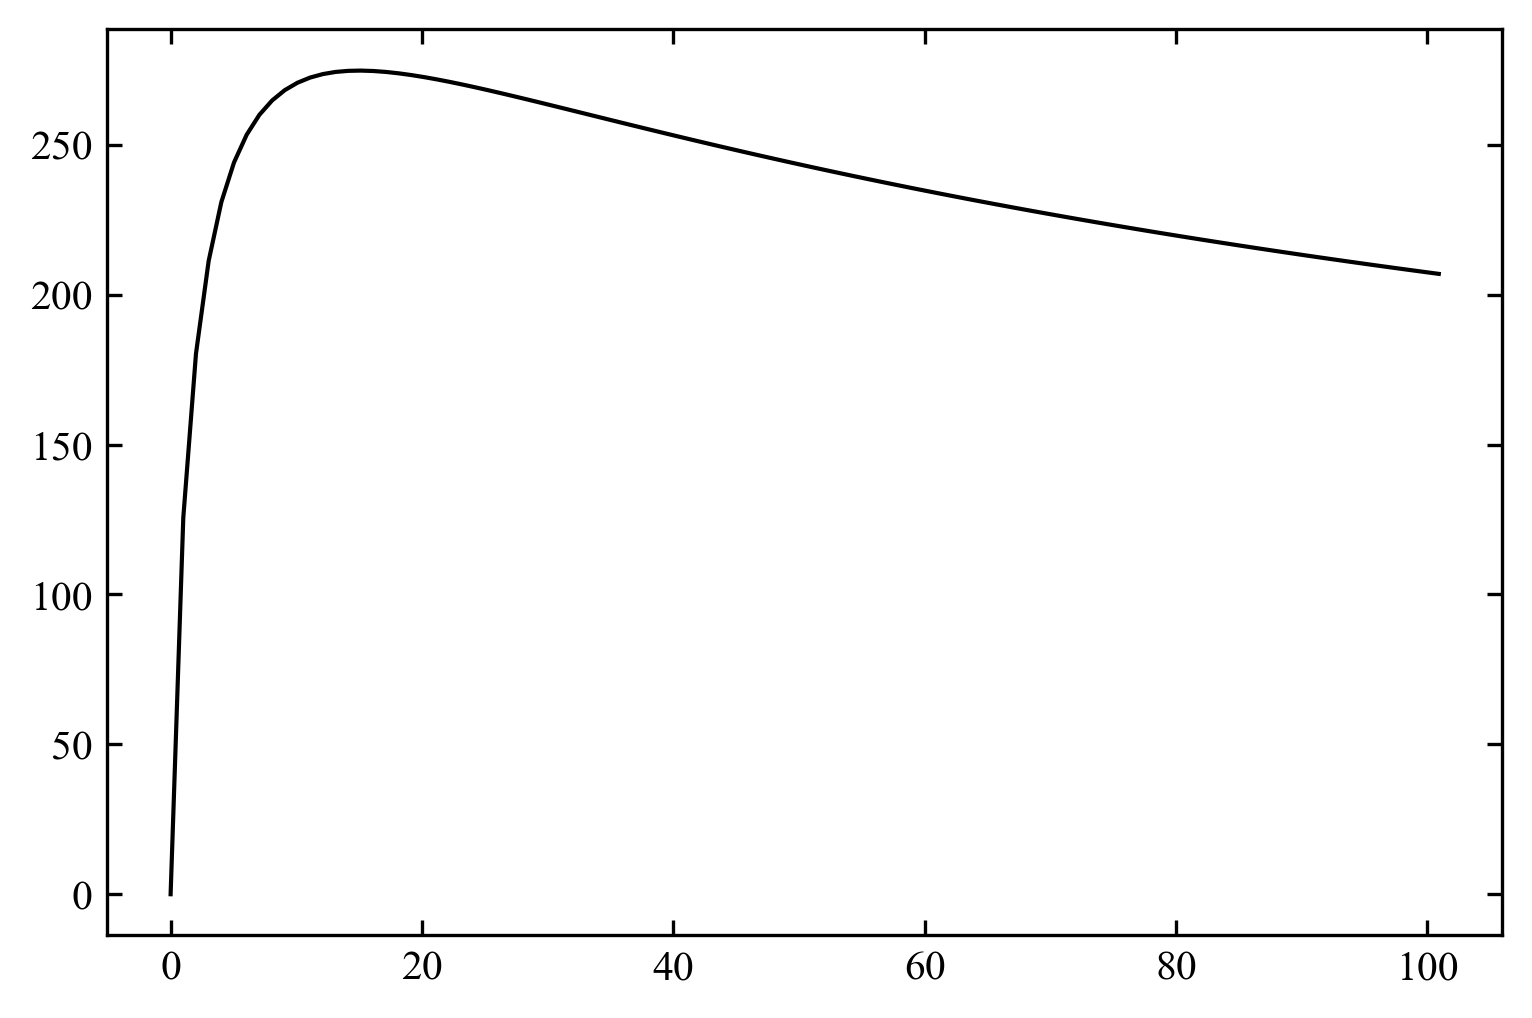

In [34]:
vc = halo1.circular_velocity(r)
vc[r == 0.] = 0.
plt.plot(r, vc, color='black')

In [10]:
# plt.plot(np.log10(r/halo1.calc_rvir()), np.log10(halo1(r)/halo1.calc_rhovirbar()))
# plt.gca().set_xlim([-2.,0.])
# plt.gca().set_ylim([-1.,4.])

In [11]:
def plot_set_rho_vcirc(rlog, rlin, mvir, s1c2_list, z=2.):
    f = plt.figure()
    scale = 3.5
    ncols = 2
    nrows = 1

    f.set_size_inches(1.1*ncols*scale, nrows*scale)
    gs = gridspec.GridSpec(nrows,ncols, wspace=0.25)
    axes = []
    for i in range(nrows):
        for j in range(ncols):
            axes.append(plt.subplot(gs[i,j]))
        
        
    halos = []
    labels = []
    colors = ['red', 'red', 'blue', 'darkblue']
    lss = ['-', '--', '-.', ':']
    for s1c2_l in s1c2_list:
        s1, c2 = s1c2_l
        label = r'$s_1={:0.0f}, c_2={:0.0f}$'.format(s1,c2)
        halo = models.DekelZhao(mvirial=mvir, s1=s1, c2=c2, z=z, name='halo')
        halos.append(halo)
        labels.append(label)
        
    k = -1
    
    #####
    k += 1
    ax = axes[k]
    
    for i, halo in enumerate(halos):
        color = colors[i]
        ls = lss[i]
        label = labels[i]
        ax.plot(np.log10(rlog), np.log10(halo(rlog*halo.calc_rvir())/halo.calc_rhovirbar()), 
               color=color, ls=ls, label=label)
        
        
    ax.set_xlim([-2., 0.])
    ax.set_ylim([-1., 4.])
    ax.set_xlabel(r'$\log_{10}(r/R_{\rm vir})$')
    ax.set_ylabel(r'$\log_{10}(\rho/\overline{\rho_{\rm vir}})$')
    
    frameon = False
    borderpad = 0.5
    markerscale = 0.8 #1.
    labelspacing= 0.25
    handletextpad = 0.5
    handlelength = 2.
    fontsize_leg= 10
    legend = ax.legend(labelspacing=labelspacing, borderpad=borderpad,
                markerscale=markerscale,
                handletextpad=handletextpad,
                handlelength=handlelength,
                loc='lower left',
                frameon=frameon, numpoints=1,
                scatterpoints=1,
                fontsize=fontsize_leg)
    
    
    #####
    k += 1
    ax = axes[k]
    
    for i, halo in enumerate(halos):
        color = colors[i]
        ls = lss[i]
        label = labels[i]
        vc = halo.circular_velocity(rlin*halo.calc_rvir())
        vc[rlin == 0.] = 0.
        ax.plot(rlin, vc/halo.circular_velocity(halo.calc_rvir()), 
               color=color, ls=ls, label=label)
        
    ax.set_xlim([0., 1.])
    ax.set_ylim([0., 1.5])
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_xlabel(r'$r/R_{\rm vir}$')
    ax.set_ylabel(r'$V/V_{\rm vir}$')
    
    

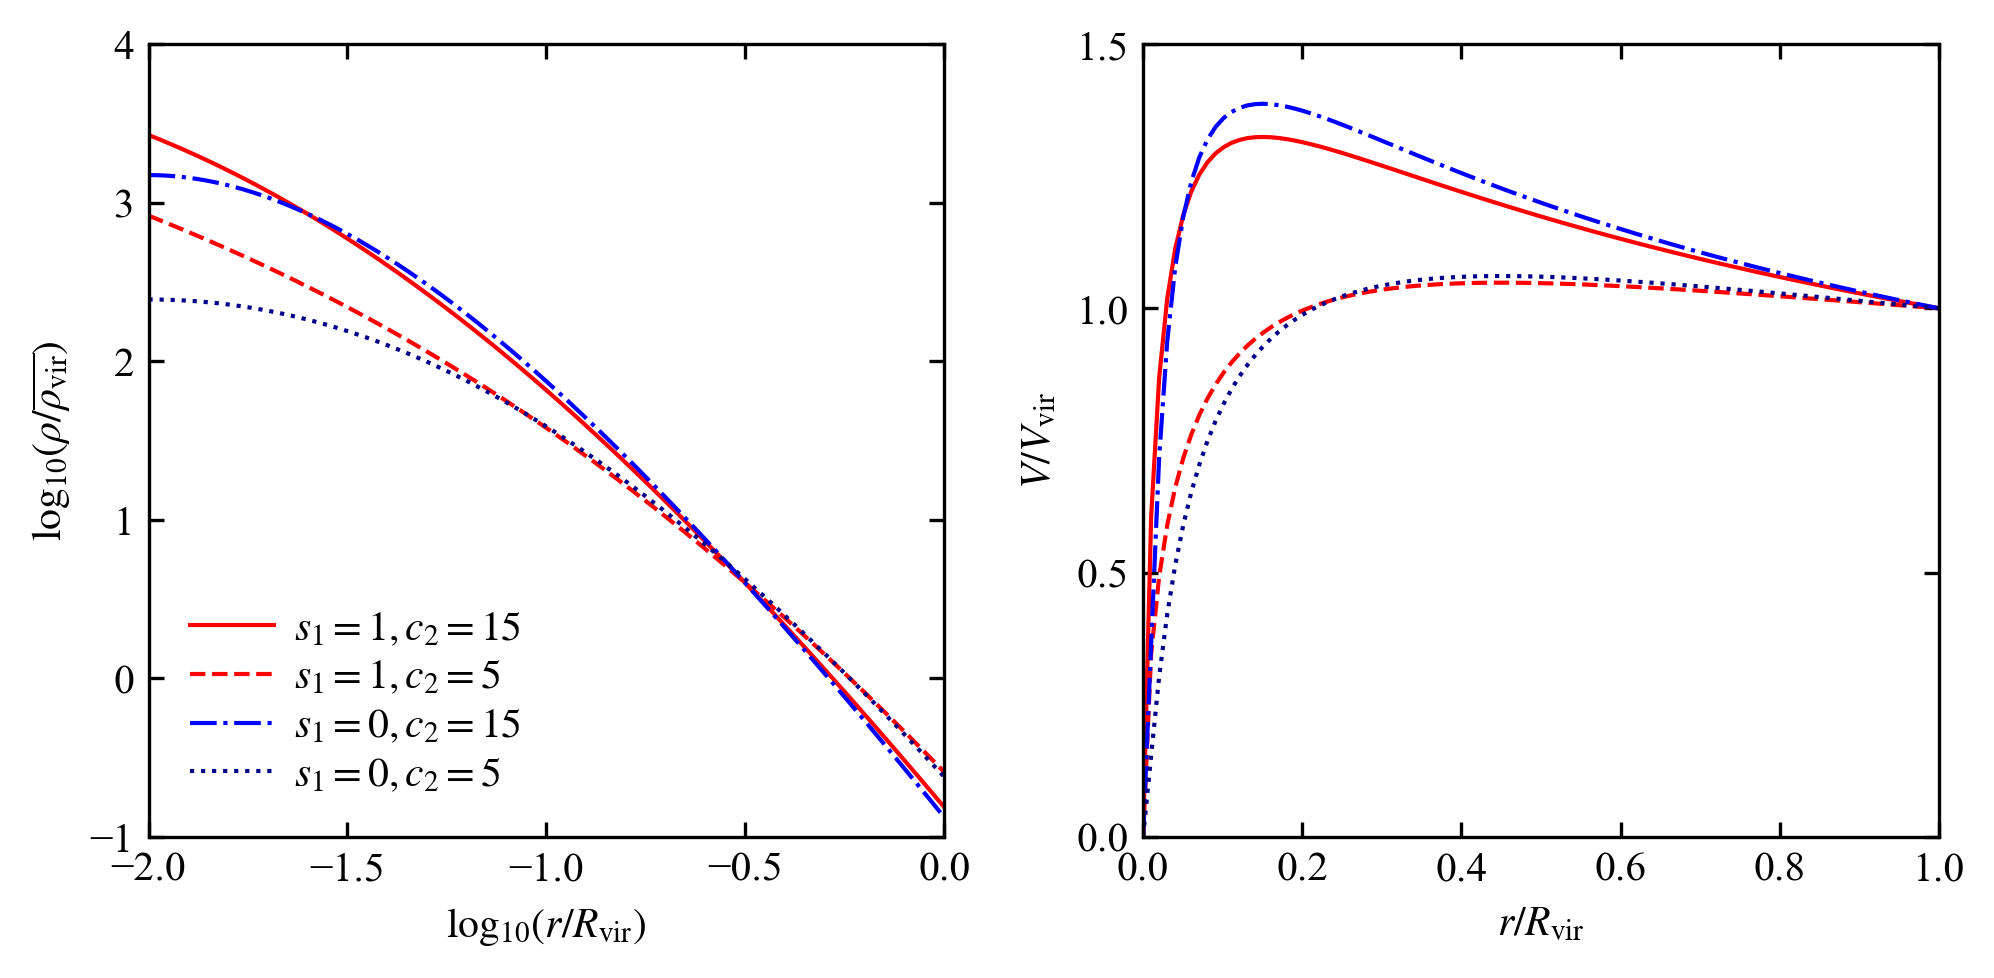

In [12]:
rlog = np.logspace(-2.,0.,101)
rlin = np.linspace(0.,1.01,101)
mvir = 12.
s1c2_list = [[1,15], [1,5], [0, 15], [0, 5]]
plot_set_rho_vcirc(rlog, rlin, mvir, s1c2_list, z=0.)

In [ ]:
reload(tied_functions)

In [ ]:
def plot_s1_c2_tied(mstartomvir, mvir, z=2.):
    mstar = mstartomvir * mvir
    
    s1 = tied_functions._DZ_s1_MstarMhalo(mstar, mvir)
    c2 = tied_functions._DZ_c2_MstarMhalo(mstar, mvir)
  
    cdmo = np.power(10., 1.025 - 0.097 * np.log10(mvir * 0.671 / 1.e12))
    sdmo = (1. + 0.03*cdmo) / (1. + 0.01*cdmo)
    s1_sDMO = s1/sdmo
    c2_cDMO = c2/cdmo
    
    f = plt.figure()
    scale = 3.5
    ncols = 2
    nrows = 2

    f.set_size_inches(1.1*ncols*scale, nrows*scale)
    gs = gridspec.GridSpec(nrows,ncols, wspace=0.25)
    axes = []
    for i in range(nrows):
        for j in range(ncols):
            axes.append(plt.subplot(gs[i,j]))
        

        
    k = -1
    
    #####
    k += 1
    ax = axes[k]
    
    ax.plot(np.log10(mstartomvir), s1, color='black')
        
    ax.set_xlim([-6., -1.])
    ax.set_ylim([0.0, 2.0])
    ax.set_xlabel(r'$\log_{10}(M_*/M_{\rm vir})$')
    ax.set_ylabel(r'$s_1$')
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
    #####
    k += 1
    ax = axes[k]
        
    ax.plot(np.log10(mstartomvir), c2, color='black')
        
    ax.set_xlim([-6., -1.])
    ax.set_ylim([0.0, 35.0])
    ax.set_xlabel(r'$\log_{10}(M_*/M_{\rm vir})$')
    ax.set_ylabel(r'$c_2$')

    #####
    k += 1
    ax = axes[k]
    
    ax.plot(np.log10(mstartomvir), s1_sDMO, color='black')
        
    ax.set_xlim([-6., -1.])
    ax.set_ylim([0.0, 2.0])
    ax.set_xlabel(r'$\log_{10}(M_*/M_{\rm vir})$')
    ax.set_ylabel(r'$s_1/s_{\rm DMO}$')
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
    #####
    k += 1
    ax = axes[k]
        
    ax.plot(np.log10(mstartomvir), c2_cDMO, color='black')
        
    ax.set_xlim([-6., -1.])
    ax.set_ylim([0.0, 4.0])
    ax.set_xlabel(r'$\log_{10}(M_*/M_{\rm vir})$')
    ax.set_ylabel(r'$c_2/c_{\rm DMO}$')
    ax.yaxis.set_major_locator(MultipleLocator(1.))

In [ ]:
mvir = 10.**12.
mstartomvir = np.logspace(-6., -1., 101)
plot_s1_c2_tied(mstartomvir, mvir, z=0.)